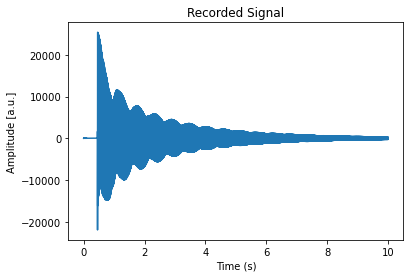

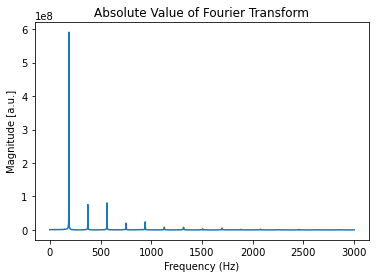

In [1]:
#select .wav file, read and plot
#calculate Fourier Transform and display absolute value 0-500 Hz
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
#%matplotlib tk
Tk().withdraw()
filename = askopenfilename() #open file dialog

# read audio samples
input_data = read(filename)
signal = input_data[1]
sampling_freq = input_data[0]
time = np.arange(len(signal))/sampling_freq

def plot_data(start_time,end_time):
	#function to plot data between start_time and end_time

	time_index1 = time.tolist().index(start_time)
	time_index2 = time.tolist().index(end_time)
	plt.figure()
	plt.plot(time[time_index1:time_index2+1],signal[time_index1:time_index2+1])
	plt.ylabel("Amplitude [a.u.]")
	plt.xlabel("Time (s)")
	plt.title("Recorded Signal")
	plt.show()

def FT_data(data,sampling_rate):
 #function to calculate and display absolute value of Fourier Transform

	freq = 0.5 * sampling_rate * np.linspace(-1.0, 1.0, len(data))
	FTdata = np.fft.fftshift(np.fft.fft(np.fft.fftshift(data)))

	freq_index1 = np.amin(np.where(freq >= 0))
	freq_index2 = np.amin(np.where(freq >= 3000))
	plt.figure()
	plt.plot(freq[freq_index1:freq_index2+1],abs(FTdata[freq_index1:freq_index2+1]))
	plt.ylabel("Magnitude [a.u.]")
	plt.xlabel("Frequency (Hz)")
	plt.title("Absolute Value of Fourier Transform")
	plt.show()
    
	return freq[freq_index1:freq_index2+1],abs(FTdata[freq_index1:freq_index2+1])

plot_data(0,10) #plot signal in time window defined by 2 values
freq, magn = FT_data(signal,sampling_freq) #Fourier Transform and plot absolute value
FFT_df = pd.DataFrame(np.vstack((freq, magn)).T, columns=['Frequency', 'Magnitude [a.u.]'])

In [20]:
def tophat(start, end, end_of_graph, density):
    ini_plot_x = np.linspace(0, end_of_graph, density)
    y = [0] * len(ini_plot_x)
    for idx, x in enumerate(ini_plot_x):
        if x >= start and x <= end:
          y[idx] = 1

    return ini_plot_x, y

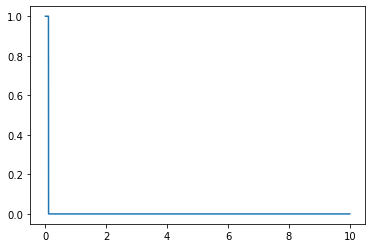

In [31]:
top_x, top_y = tophat(0,0.1,10,len(signal))
plt.plot(top_x,top_y)


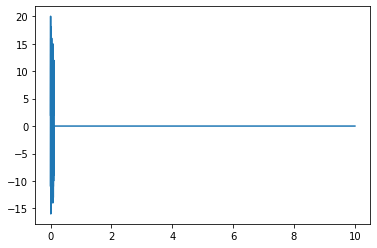

In [32]:
func_prod = top_y * signal
plt.plot(top_x,func_prod)

In [37]:
%matplotlib tk
FT_data(func_prod,sampling_freq)


(array([0.00000000e+00, 3.16592915e-02, 6.33185829e-02, ...,
        2.99993948e+03, 2.99997114e+03, 3.00000280e+03]),
 array([33351.        , 33346.22776878, 33331.91387651, ...,
          209.7101668 ,   210.14068412,   210.61660695]))

In [2]:
path='./plucked-data-2-cut-2.wav'
file_name='.csv'
FFT_df.to_csv(path+file_name)

In [38]:
import peakutils
from peakutils.plot import plot as pplot
from scipy.optimize import curve_fit
from numpy import pi,sqrt,arctan,tan

def resonance_func(w,w0,N,v,b):
    resonance_curve = N/(sqrt(((w)**2-w0**2)**2+(v*(w))**2))+b
    return resonance_curve

def find_resn(signal,sampling_freq):
    filename = askopenfilename() 
    FT_freq, magn = FT_data(signal,sampling_freq)

    indexes = peakutils.indexes(magn, thres=0.001, min_dist=2000)
    peaks = np.vstack((freq[indexes],magn[indexes])).T 
    
    freq_peaks_int = peakutils.interpolate(FT_freq, magn, ind=indexes) #interpolated

    
    plt.figure(figsize=(10,6))
    pplot(freq, magn, indexes)
    plt.title('First estimate')
    plt.show()
    print(peaks)
    print(freq_peaks_int)
    
    return [peaks, freq_peaks_int]
    
    '''
    resn_magn = []
    for m in magn:
        if m > 
    initial_guess=[143,5e9,1,100000] 
    po,po_cov=curve_fit(resonance_func,FT_freq,magn,initial_guess)
    plt.figure()
    plt.plot(FT_freq,magn)
    plt.plot(FT_freq,resonance_func(FT_freq,po[0],po[1],po[2],po[3]))
    print('f0 = %.3e +/- %.3e Hz' %(po[0],sqrt(po_cov[0,0])))
    print('N =  %.3e +/- %.3e' %(po[1],sqrt(po_cov[1,1])))
    print('v = %.3e +/- %.3e' %(po[2],sqrt(po_cov[2,2])))
    print('b = %.3e +/- %.3e' %(po[3],sqrt(po_cov[3,3])))
    '''


In [39]:
resn, freq_resi = find_resn(signal,sampling_freq)

[[5.00533398e+01 9.52148322e+05]
 [1.23914467e+02 1.23111555e+06]
 [1.87423005e+02 5.90840107e+08]
 [3.74909330e+02 7.57509243e+07]
 [5.64168574e+02 8.06883572e+07]
 [7.51686557e+02 2.00888255e+07]
 [9.40914142e+02 2.40632379e+07]
 [1.12849544e+03 8.07069588e+06]
 [1.31851451e+03 7.86691884e+06]
 [1.50609581e+03 2.88364518e+06]
 [1.69696968e+03 5.74504803e+06]
 [1.88458264e+03 1.88795006e+06]
 [2.07589974e+03 2.25538890e+06]
 [2.26344938e+03 8.45446963e+05]
 [2.45774246e+03 1.14448604e+06]]
[1581.         3914.          187.46439665  374.95825806  564.23737891
  751.75452083  940.98886319 1128.54737351 1318.56630806 1506.10024711
 1697.01224442 1884.59791244 2075.88830598 2263.52354196 2457.78890336]


/Users/afyqeyzar/opt/anaconda3/lib/python3.8/site-packages/peakutils/peak.py:246: UserWarning: Optimal parameters not found: Number of calls to function has reached maxfev = 800.
  warnings.warn(str(e))


In [40]:
freq_resi = freq_resi[1:]

In [41]:
freq_resi

array([3914.        ,  187.46439665,  374.95825806,  564.23737891,
        751.75452083,  940.98886319, 1128.54737351, 1318.56630806,
       1506.10024711, 1697.01224442, 1884.59791244, 2075.88830598,
       2263.52354196, 2457.78890336])

In [42]:
# Ratio of overtone frequencies with the fundamental frequency
for i in range(len(freq_resi)-1):
    print(freq_resi[i+1]/freq_resi[0])

0.04789586015478514
0.09579924835496256
0.14415875802377354
0.1920680942326402
0.240416163309071
0.2883360688582762
0.3368845958247452
0.38479822358447935
0.4335749219270732
0.48150176608194706
0.5303751420492664
0.5783146504763229
0.6279481102084454


In [43]:
T = 9.81*5
mu = 0.628e-03
v = np.sqrt(T/mu)
print(v , 'm/s')

279.4728887412897 m/s


In [44]:
L = 0.7
def f_n(n,gamma):
    return np.sqrt((n*np.pi*v/L)**2-(gamma/2)**2)/2/np.pi

In [45]:
#theoretical frequencies for n=1 to n=13 with gamma=0
freq_res_theor = []
n = np.arange(1,len(freq_resi)+1,1)
for i in n:
    freq_res_theor.append(f_n(i,0))
    #print(i,f_n(i,0))
    
freq_res_theor

[199.6234919580641,
 399.2469839161282,
 598.8704758741923,
 798.4939678322564,
 998.1174597903203,
 1197.7409517483845,
 1397.3644437064486,
 1596.9879356645129,
 1796.6114276225767,
 1996.2349195806405,
 2195.8584115387043,
 2395.481903496769,
 2595.1053954548333,
 2794.728887412897]

In [46]:
percent_err = (freq_res_theor-freq_resi)/freq_res_theor*100
pd.DataFrame(np.vstack((n,freq_res_theor,freq_resi,percent_err)).T , columns=['n','Theoretical Res Freq / Hz','Plucked String Res Freq / Hz','Percentage Difference %'])

,n,Theoretical Res Freq / Hz,Plucked String Res Freq / Hz,Percentage Difference %
0,1.0,199.623492,3914.000000,-1860.691080
1,2.0,399.246984,187.464397,53.045507
2,3.0,598.870476,374.958258,37.389089
3,4.0,798.493968,564.237379,29.337302
4,5.0,998.117460,751.754521,24.682760
5,6.0,1197.740952,940.988863,21.436362
6,7.0,1397.364444,1128.547374,19.237435
7,8.0,1596.987936,1318.566308,17.434172
8,9.0,1796.611428,1506.100247,16.169951
9,10.0,1996.234920,1697.012244,14.989352


In [47]:
for i in n:
    print(i,f_n(i,1961.57807207))

1 124.43123806775026
2 367.46666329296727
3 578.169042183446
4 783.0876139551962
5 985.8357155245611
6 1187.5255710765423
7 1388.618371980068
8 1589.3407630598115
9 1789.8173695462826
10 1990.122470758689
11 2190.3031201162144
12 2390.390584077432
13 2590.406456134699
14 2790.3661316403754


In [48]:
initial_guess=[1000] 
po,po_cov=curve_fit(f_n,n,freq_resi,initial_guess)
gamma = po[0]
plt.plot(n,f_n(n,gamma),'x-')
plt.plot(n,freq_resi,'o-')
plt.grid
print(str(po[0]),'±',str(np.sqrt(po_cov[0][0])))
percent_err = np.abs(freq_resi-f_n(n,gamma))/f_n(n,gamma)*100
pd.DataFrame(np.vstack((n,f_n(n,gamma),freq_resi,percent_err)).T , columns=['n','Theoretical Res Freq / Hz','Plucked String Res Freq / Hz','Percentage Difference %'])

-0.043478391084363466 ± inf


<ipython-input-44-4e02d3352ec6>:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((n*np.pi*v/L)**2-(gamma/2)**2)/2/np.pi
/Users/afyqeyzar/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


,n,Theoretical Res Freq / Hz,Plucked String Res Freq / Hz,Percentage Difference %
0,1.0,199.623492,3914.000000,1860.691080
1,2.0,399.246984,187.464397,53.045507
2,3.0,598.870476,374.958258,37.389089
3,4.0,798.493968,564.237379,29.337302
4,5.0,998.117460,751.754521,24.682760
5,6.0,1197.740952,940.988863,21.436362
6,7.0,1397.364444,1128.547374,19.237435
7,8.0,1596.987936,1318.566308,17.434172
8,9.0,1796.611428,1506.100247,16.169951
9,10.0,1996.234920,1697.012244,14.989352


In [49]:
m,c = np.polyfit(n,xpi,1)

plt.plot(n, xpi, '.-')


NameError: name 'xpi' is not defined